In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
params = {
    'IC': 3840000,
    'G': 250000, 
    'theta': 0.8,
    'n': 15,
    'phi': 0.5,
    'sigma_H': 0.25, 
    'sigma_K': 0.01, 
    'alpha_E': 0.0523,
    'sigma_E': 0.0856,
    'delta': 1.025,
    'H0': 0.0036,
    'K0': 0.43,
    'PE0': 0.24,
    'N': 25,
    'alpha': 0.05,
    'beta': 0.2,
    'r0': 0.031,
    'rR': 0.031,
    'rP': 0.031,
    'rE': 0.06,
    'rho': -20,
    'eps_H': 0.01,
    'eps_P': 0.01,
    'eps_K': 0.001
    }

In [3]:
def rrse(actual: np.ndarray, predicted: np.ndarray):
    """ Root Relative Squared Error """
    return np.sqrt(np.sum(np.square(actual - predicted)) / np.sum(np.square(actual - np.mean(actual))))

In [4]:
def GBM(S0, mu, sigma, eps, T, n_time, N_sim):
    # calc each time step
    dt = T/n_time
    # simulation using numpy arrays
    St = np.exp((mu - sigma ** 2 / 2) * dt + sigma * eps * np.random.normal(0, np.sqrt(dt), size=(N_sim,n_time)).T)
    # Define time interval correctly 
    time = np.linspace(0,T,n_time+1)
    tt = np.full(shape=(N_sim,n_time+1), fill_value=time).T
    # include array of 1's
    St = np.vstack([np.ones(N_sim), St])
    # multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
    St = S0 * St.cumprod(axis=0)
    return tt, St

In [5]:
IC = params['IC']
sigma_H = params['sigma_H']
sigma_K = params['sigma_K']
alpha_E = params['alpha_E']
sigma_E = params['sigma_E']
delta = params['delta']
H0 = params['H0']
K0 = params['K0']
PE0 = params['PE0']
N = params['N']
alpha = params['alpha']
beta = params['beta']
r0 = params['r0']
rR = params['rR']
rP = params['rP']
rE = params['rE']
rho = params['rho']
eps_H = params['eps_H']
eps_P = params['eps_P']
eps_K = params['eps_K']
phi = params['phi']
theta = params['theta']
n = params['n']
G = params['G']
t = np.arange(N+1)

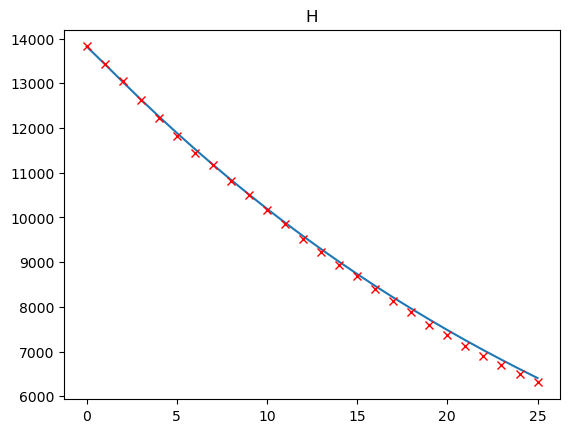

RRSE H mean:  0.04687579269624951
RRSE H std:  0.021659350501359368


In [6]:
# test H
H = IC*H0*np.exp((-np.square(sigma_H)*t/2)+(sigma_H*eps_H*np.sqrt(t)))
plt.plot(t, H)
tt, Hr = GBM(IC*H0, 0, sigma_H, eps_H, N, N, 1)
plt.plot(t, Hr, 'rx')
plt.title('H')
plt.show()

rrse_H = list()
n = 30
for i in range(n):
    tt, H_r = GBM(IC*H0, 0, sigma_H, eps_H, N, N, 1)
    Hr = H_r.reshape(-1)
    rrse_H.append(rrse(Hr, H))
    
rrse_H_mean = np.mean(rrse_H)
rrse_H_std = np.std(rrse_H)
print("RRSE H mean: ", rrse_H_mean)
print("RRSE H std: ", rrse_H_std)

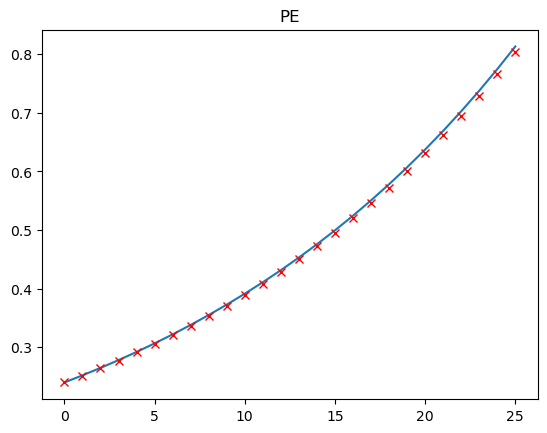

RRSE PE mean:  0.012724121947844304
RRSE PE std:  0.006557441627731925


In [7]:
# test PE
PE = PE0*np.exp((alpha_E-(np.square(sigma_E)/2))*t+sigma_E*eps_P*np.sqrt(t))
plt.plot(t, PE)
tt, PEr = GBM(PE0, alpha_E, sigma_E, eps_P, N, N, 1)
plt.plot(t, PEr, 'rx')
plt.title('PE')
plt.show()

rrse_PE = list()
for i in range(n):
    tt, PE_r = GBM(PE0, alpha_E, sigma_E, eps_P, N, N, 1)
    PEr = PE_r.reshape(-1)
    rrse_PE.append(rrse(PEr, PE))

rrse_PE_mean = np.mean(rrse_PE)
rrse_PE_std = np.std(rrse_PE)
print("RRSE PE mean: ", rrse_PE_mean)
print("RRSE PE std: ", rrse_PE_std)

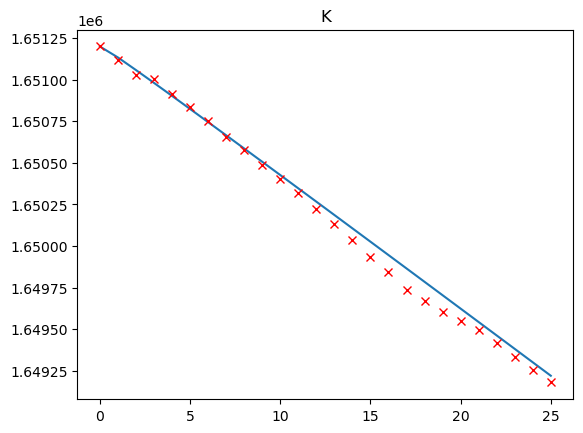

RRSE K mean:  0.09659548823982819
RRSE K std:  0.06613775158453564


In [8]:
# test K
K = IC*K0*np.exp((-np.square(sigma_K)*t/2)+(sigma_K*eps_K*np.sqrt(t)))
plt.plot(t, K)
tt, Kr = GBM(IC*K0, 0, sigma_K, eps_K, N, N, 1)
plt.plot(t, Kr, 'rx')
plt.title('K')
plt.show()

rrse_K = list()
for i in range(n):
    tt, K_r = GBM(IC*K0, 0, sigma_K, eps_K, N, N, 1)
    Kr = K_r.reshape(-1)
    rrse_K.append(rrse(Kr, K))

rrse_K_mean = np.mean(rrse_K)
rrse_K_std = np.std(rrse_K)
print("RRSE K mean: ", rrse_K_mean)
print("RRSE K std: ", rrse_K_std)

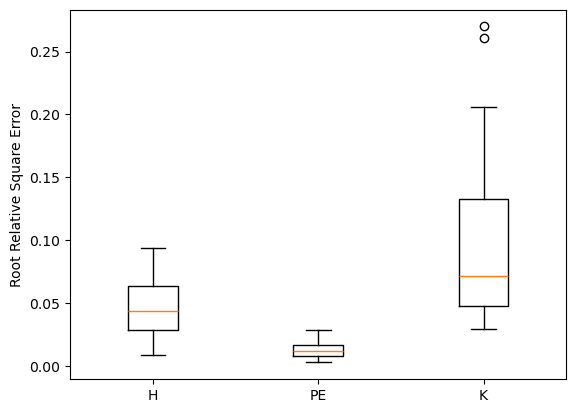

In [10]:
rrse1 = [rrse_H, rrse_PE, rrse_K]
plt.boxplot(rrse1, tick_labels=['H', 'PE', 'K'])
plt.ylabel('Root Relative Square Error')
plt.show()